In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
#the data used for training

In [124]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Safety_DataSet_Aggregated.csv')

In [125]:
df

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed,label
0,0,12.0,143.298294,0.818112,-9.941461,-2.014999,-0.016245,-0.094040,0.070732,0.0,3.442991,0
1,0,8.0,143.298294,0.546405,-9.835590,-2.038925,-0.047092,-0.078874,0.043187,1.0,0.228454,0
2,0,8.0,143.298294,-1.706207,-9.270792,-1.209448,-0.028965,-0.032652,0.015390,2.0,0.228454,0
3,0,8.0,143.298294,-1.416705,-9.548032,-1.860977,-0.022413,0.005049,-0.025753,3.0,0.228454,0
4,0,8.0,143.298294,-0.598145,-9.853534,-1.378574,-0.014297,-0.046206,0.021902,4.0,0.228454,0
...,...,...,...,...,...,...,...,...,...,...,...,...
16154413,1709396983975,8.0,199.547104,-0.320905,-8.949738,-3.971979,-0.012879,0.015905,-0.007625,559.0,1.035811,1
16154414,1709396983975,8.0,199.547104,-0.418253,-8.929102,-3.950296,-0.006455,0.005278,-0.000082,560.0,1.035811,1
16154415,1709396983975,12.0,199.547104,-0.226697,-8.914597,-4.338940,0.044719,0.032351,-0.018600,561.0,0.302453,1
16154416,1709396983975,12.0,199.547104,-0.372943,-8.951382,-4.416550,0.053263,0.029213,-0.016357,562.0,0.302453,1


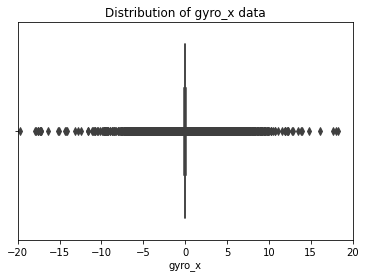

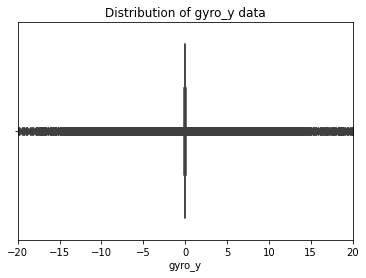

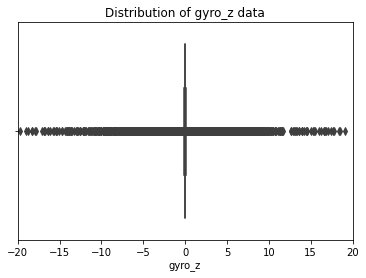

In [126]:
import seaborn as sns
import matplotlib.pyplot as plt
for col in ['gyro_x', 'gyro_y', 'gyro_z']:
    sns.boxplot(df[col])
    plt.title("Distribution of {} data".format(col))
    plt.xlim(-20, 20)
    plt.show()

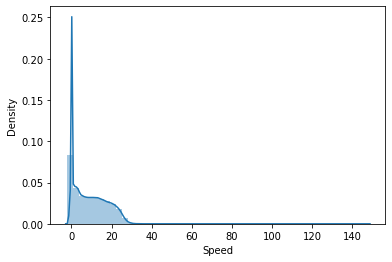

In [127]:
sns.distplot(df['Speed'])

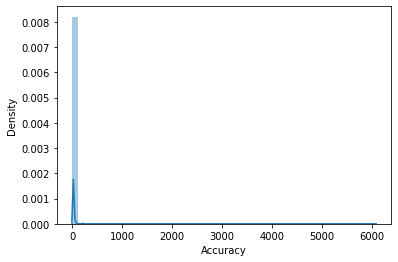

In [128]:
sns.distplot(df['Accuracy'])

In [129]:
from sklearn.decomposition import PCA
pca_gyro = PCA().fit(df.loc[:, ['gyro_x', 'gyro_y', 'gyro_z']])
pca_gyro.explained_variance_ratio_
# The first principal component can explain the variations in gyroscope data fairly well .Thus, we will only keep the first component for modelling.

array([0.73367101, 0.13881253, 0.12751646])

In [130]:
pca_gyro2 = PCA().fit(df.loc[:, ['acceleration_x', 'acceleration_y', 'acceleration_z']])
pca_gyro2.explained_variance_ratio_

array([0.8597306 , 0.11459168, 0.02567772])

In [131]:
#arrays = [["Accuracy", "Bearing	acceleration_x",	"acceleration_y",	"acceleration_z",	"gyro_x",	"gyro_y", "gyro_z",	"second",	"Speed",	"label"]
df2 = df.groupby('bookingID',as_index=False).mean()

In [132]:
print("Column names:", df2.columns, "\nnumber of rows: ", len(df2)) 
print(df2.dtypes)
print('Missing values: \n', df2.isnull().sum())

Column names: Index(['bookingID', 'Accuracy', 'Bearing', 'acceleration_x', 'acceleration_y',
       'acceleration_z', 'gyro_x', 'gyro_y', 'gyro_z', 'second', 'Speed',
       'label'],
      dtype='object') 
number of rows:  20000
bookingID           int64
Accuracy          float64
Bearing           float64
acceleration_x    float64
acceleration_y    float64
acceleration_z    float64
gyro_x            float64
gyro_y            float64
gyro_z            float64
second            float64
Speed             float64
label             float64
dtype: object
Missing values: 
 bookingID         0
Accuracy          0
Bearing           0
acceleration_x    0
acceleration_y    0
acceleration_z    0
gyro_x            0
gyro_y            0
gyro_z            0
second            0
Speed             0
label             0
dtype: int64


In [133]:
df0=df2[df2['label'] == 0]

print(df0)

           bookingID   Accuracy     Bearing  ...      second      Speed  label
0                  0  10.165339  176.526099  ...  903.526892   8.994822    0.0
4                  6   4.586721  197.812785  ...  547.000000   4.628921    0.0
5                  7   3.681034  101.562698  ...  480.947313  12.176386    0.0
6                  8   7.008253  172.803618  ...  256.847545   5.351266    0.0
7                 10   3.815000  120.605333  ...  187.000000   8.702027    0.0
...              ...        ...         ...  ...         ...        ...    ...
19967  1700807049400   6.656564  206.350689  ...  328.284839  12.783462    0.0
19970  1700807049403   3.776021  107.050209  ...  119.815900   2.554366    0.0
19971  1700807049404  13.279365  221.526410  ...  397.238095   6.156889    0.0
19972  1700807049406   3.665604  170.044568  ...  359.966574   9.721643    0.0
19973  1700807049407   4.748870  124.983008  ...  642.802889   8.348759    0.0

[14999 rows x 12 columns]


In [134]:
df1=df2[df2['label'] == 1]

print(df1)

           bookingID   Accuracy     Bearing  ...      second      Speed  label
1                  1   3.718763  124.198590  ...  581.175088   7.881588    1.0
2                  2   3.930626  173.794872  ...  339.441026   3.157213    1.0
3                  4  10.000000  151.807013  ...  547.495430   6.150996    1.0
13                18  11.236715  172.307039  ...  517.000000   4.738116    1.0
24                35   5.223068  239.553153  ...  832.000000  16.619441    1.0
...              ...        ...         ...  ...         ...        ...    ...
19995  1709396983957   4.012152  169.904096  ...  541.414585   2.305969    1.0
19996  1709396983960  11.938692  179.182557  ...  423.769755   7.611645    1.0
19997  1709396983966   9.412141  198.738462  ...  575.269231  12.718705    1.0
19998  1709396983971   5.401185  204.802228  ...  540.761374   6.245733    1.0
19999  1709396983975  30.910138  109.359487  ...  302.179724   4.400441    1.0

[4983 rows x 12 columns]


In [135]:
df0 = df0.sample(n=len(df1))
df0

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed,label
1844,137438953605,4.158588,84.178497,0.557621,8.836170,4.474395,0.001330,0.005286,0.000581,479.541754,7.605418,0.0
3006,223338299432,8.150538,229.991591,0.088678,-9.619786,-2.037328,-0.012839,0.001285,-0.005916,367.483871,9.560362,0.0
17953,1503238553740,5.189421,200.919440,0.230689,9.728452,1.278186,0.001234,-0.001207,-0.005784,702.746935,14.962789,0.0
17343,1460288880707,4.066501,98.907895,0.156595,9.733119,0.503827,-0.000377,-0.005466,-0.001094,456.896930,4.141404,0.0
14860,1228360646720,10.000000,165.642352,0.090797,-9.554647,2.187579,0.009899,-0.033612,0.004328,222.526316,6.166000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
19705,1675037245559,14.405624,132.485149,0.007242,9.581153,0.371788,0.001093,0.006378,0.008370,197.009901,9.934070,0.0
2042,154618822704,9.409471,140.179149,1.088330,-9.812033,-0.192391,-0.021791,0.026714,0.007118,208.713092,13.388189,0.0
4563,352187318370,3.425019,156.441270,-0.382777,9.427228,1.573682,0.002623,0.001511,-0.002083,472.975661,4.055150,0.0
10301,824633720898,8.876404,126.773900,0.179168,-9.797666,-0.814593,0.005612,0.006618,-0.012939,548.708801,15.568349,0.0


In [136]:
df_bal=pd.concat([df0, df1])
df_bal

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed,label
1844,137438953605,4.158588,84.178497,0.557621,8.836170,4.474395,0.001330,0.005286,0.000581,479.541754,7.605418,0.0
3006,223338299432,8.150538,229.991591,0.088678,-9.619786,-2.037328,-0.012839,0.001285,-0.005916,367.483871,9.560362,0.0
17953,1503238553740,5.189421,200.919440,0.230689,9.728452,1.278186,0.001234,-0.001207,-0.005784,702.746935,14.962789,0.0
17343,1460288880707,4.066501,98.907895,0.156595,9.733119,0.503827,-0.000377,-0.005466,-0.001094,456.896930,4.141404,0.0
14860,1228360646720,10.000000,165.642352,0.090797,-9.554647,2.187579,0.009899,-0.033612,0.004328,222.526316,6.166000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1709396983957,4.012152,169.904096,0.094130,1.860878,9.668742,0.006799,-0.008030,-0.003830,541.414585,2.305969,1.0
19996,1709396983960,11.938692,179.182557,0.625696,-8.680648,-4.512526,-0.016472,0.006266,-0.001241,423.769755,7.611645,1.0
19997,1709396983966,9.412141,198.738462,-0.208879,9.072497,3.319529,0.000408,0.000600,0.001489,575.269231,12.718705,1.0
19998,1709396983971,5.401185,204.802228,0.669512,8.896987,3.759712,0.003282,-0.000685,-0.000242,540.761374,6.245733,1.0


In [137]:
df_bal = df_bal.drop(columns=['bookingID', 'gyro_y', 'gyro_z', 'acceleration_y', 'acceleration_z'])
df_bal.head()

,Accuracy,Bearing,acceleration_x,gyro_x,second,Speed,label
1844,4.158588,84.178497,0.557621,0.001330,479.541754,7.605418,0.0
3006,8.150538,229.991591,0.088678,-0.012839,367.483871,9.560362,0.0
17953,5.189421,200.919440,0.230689,0.001234,702.746935,14.962789,0.0
17343,4.066501,98.907895,0.156595,-0.000377,456.896930,4.141404,0.0
14860,10.000000,165.642352,0.090797,0.009899,222.526316,6.166000,0.0


In [138]:
df_bal['distance'] = df_bal['Speed']*df_bal['second']

In [139]:
Y = df_bal['label']
X = df_bal.drop(columns= ['label'])
Y.head()

1844     0.0
3006     0.0
17953    0.0
17343    0.0
14860    0.0
Name: label, dtype: float64

In [140]:
X.head()

,Accuracy,Bearing,acceleration_x,gyro_x,second,Speed,distance
1844,4.158588,84.178497,0.557621,0.001330,479.541754,7.605418,3647.115619
3006,8.150538,229.991591,0.088678,-0.012839,367.483871,9.560362,3513.278718
17953,5.189421,200.919440,0.230689,0.001234,702.746935,14.962789,10515.054188
17343,4.066501,98.907895,0.156595,-0.000377,456.896930,4.141404,1892.194548
14860,10.000000,165.642352,0.090797,0.009899,222.526316,6.166000,1372.097264


In [141]:
import numpy
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import to_categorical
from sklearn import model_selection
from sklearn import preprocessing
from keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

# Split dataset into train / test
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(
      X, Y, test_size=0.2, random_state=42)
# Scale data (training set) to 0 mean and unit standard deviation.
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
# create model
model = Sequential()
model.add(Dense(512, input_dim=7, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', 
              metrics=['accuracy'])
print(model.summary())
# training the model

history = model.fit(X_train,Y_train, batch_size=100000,epochs = 10, 
                    validation_data = (X_test, Y_test),verbose = 2, 
                    callbacks=[learning_rate_reduction])
# eval model
scores = model.evaluate(X_test, Y_test)

# calculate predictions
predictions = model.predict(X_test)
# round predictions
rounded = [round(x[0]) for x in predictions]
#print(rounded)
print("MLP Error: %.2f%%" % (100-scores[1]*100))


Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_78 (Dense)             (None, 512)               4096      
_________________________________________________________________
dense_79 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_80 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_81 (Dense)             (None, 30)                3870      
_________________________________________________________________
dense_82 (Dense)             (None, 1)                 31        
Total params: 172,221
Trainable params: 172,221
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
1/1 - 0s - loss: 0.6952 - accuracy: 0.5008 - val_loss: 0.6923 - val_accuracy: 0.5226
Epoch 2/10
1